import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print("Libraries imported successfully!")

Libraries imported successfully!


Image loaded successfully with dimensions: (300, 300)


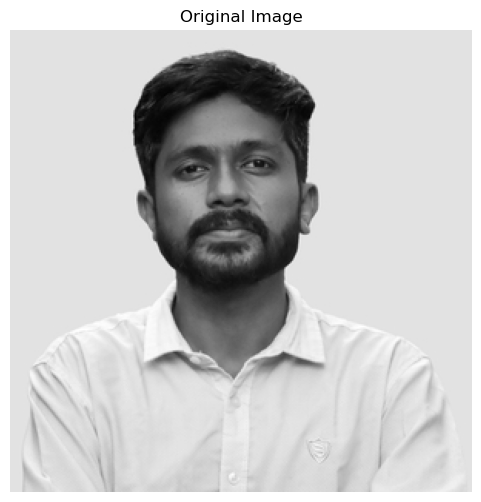

In [2]:
# --- IMPORTANT: Change this to your uploaded file's name ---
image_path = '/Users/rishad/Downloads/Lab/Rishad design.jpg'

# Load the image and convert to a grayscale numpy matrix
try:
    img = Image.open(image_path).convert('L') # 'L' converts to grayscale
    img_matrix = np.array(img, dtype=float)
except FileNotFoundError:
    print(f"Error: Make sure you have uploaded '{image_path}' and the filename is correct.")
    img_matrix = np.zeros((100,100)) # Placeholder to prevent further errors

original_shape = img_matrix.shape
print(f"Image loaded successfully with dimensions: {original_shape}")

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(img_matrix, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [3]:
# Step 1: Calculate the mean and subtract it from the matrix
mean_val = np.mean(img_matrix)
centered_matrix = img_matrix - mean_val

print(f"Data centered by subtracting the mean value: {mean_val:.2f}")

Data centered by subtracting the mean value: 194.97


In [4]:

# STEP 2: COMPUTE THE COVARIANCE MATRIX MANUALLY
# ===================================================================
# The formula is (1/(n-1)) * (Centered_Matrix.T @ Centered_Matrix)
# where 'n' is the number of samples (rows).

print("\nStep 2: Computing Covariance Matrix Manually...")

# Get the number of samples (which is the number of rows)
n_samples = centered_matrix.shape[0]

# Perform the matrix multiplication: Transpose(X) @ X
# The '@' symbol is NumPy's operator for matrix multiplication.
#multiplied_matrix = centered_matrix.T @ centered_matrix

multiplied_matrix = np.dot(centered_matrix.T, centered_matrix)

# Divide by (n-1) to get the final sample covariance matrix
cov_matrix = multiplied_matrix / (n_samples)


print("Covariance Matrix Computed Manually")
print(f"Shape of the covariance matrix: {cov_matrix.shape}")

# ===================================================================

# Step 3: Calculate eigenvalues and eigenvectors using eigh for real results

# ===================================================================
# This is better because a covariance matrix is always symmetric.
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print(f"Eigenvalues and eigenvectors computed.")
print("\nStep 3: Eigenvalues and Eigenvectors Computed (using np.linalg.eigh)")
print(f"Number of eigenvalues: {len(eigenvalues)}")
print(f"Shape of eigenvectors matrix: {eigenvectors.shape}")


Step 2: Computing Covariance Matrix Manually...
Covariance Matrix Computed Manually
Shape of the covariance matrix: (300, 300)
Eigenvalues and eigenvectors computed.

Step 3: Eigenvalues and Eigenvectors Computed (using np.linalg.eigh)
Number of eigenvalues: 300
Shape of eigenvectors matrix: (300, 300)


In [5]:
# Step 4: Sort eigenvalues and eigenvectors from largest to smallest
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# --- 🔬 EXPERIMENT HERE ---
# Change k to the number of components you want to keep.
# A smaller 'k' means more compression. Try 10, 20, 50, 100...
k = 20

# Keep only the top k components
top_k_eigenvectors = sorted_eigenvectors[:, :k]
print(f"Keeping the top {k} principal components.")


# Step 5: Project the data onto the new, smaller dimension
projected_data = np.dot(top_k_eigenvectors.T, centered_matrix)
print(f"Shape of compressed data: {projected_data.shape}")


# Step 6: Reconstruct the image from the compressed data
reconstructed_matrix = np.dot(top_k_eigenvectors, projected_data)
reconstructed_matrix += mean_val # Add the mean back
print(f"Image reconstructed with shape: {reconstructed_matrix.shape}")

Keeping the top 20 principal components.
Shape of compressed data: (20, 300)
Image reconstructed with shape: (300, 300)


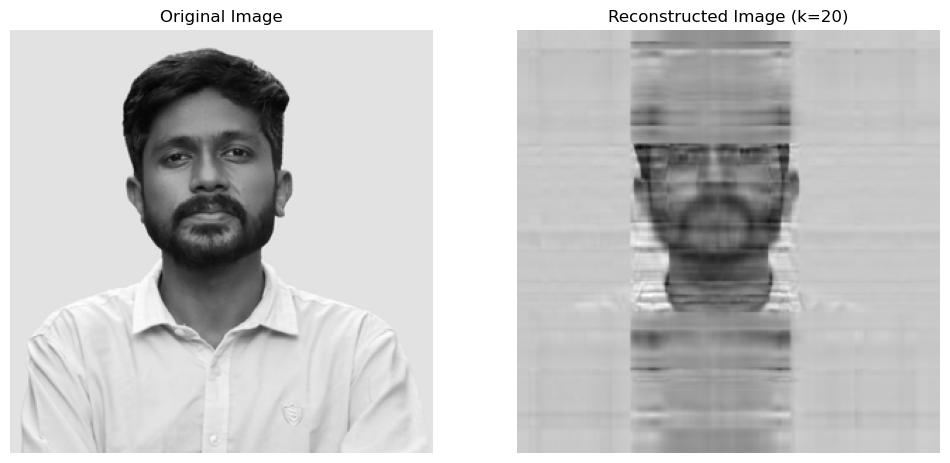


--- Compression Analysis ---
Original data size (total numbers): 90000
Compressed data size (total numbers): 12000
Compression Ratio: 7.50 : 1


In [6]:
# Display the original and reconstructed images side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_matrix, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(reconstructed_matrix, cmap='gray')
axes[1].set_title(f"Reconstructed Image (k={k})")
axes[1].axis('off')

plt.show()

# --- Analysis ---
original_size = img_matrix.size
# Compressed size is the size of the eigenvectors matrix + the projected data
compressed_size = top_k_eigenvectors.size + projected_data.size
compression_ratio = original_size / compressed_size

print("\n--- Compression Analysis ---")
print(f"Original data size (total numbers): {original_size}")
print(f"Compressed data size (total numbers): {compressed_size}")
print(f"Compression Ratio: {compression_ratio:.2f} : 1")